# I. Introduction

### Background
Purchasing a residential property represents a significant milestone for many individuals. However, navigating the complexities of the real estate market within a specific budget can be an overwhelming endeavor. Property values are influenced by a diverse array of characteristics and variables, and assessing these factors objectively often proves challenging due to inherent cognitive biases. This project is driven by the need to provide a systematic framework that assists prospective buyers in evaluating their options through data-driven insights.

### Objective
The primary goal of this project is to develop a predictive model that estimates property prices based on their specific attributes. By providing accurate price projections, this model enables homebuyers to align their financial expectations with market realities, facilitating more informed and confident purchasing decisions.

### Dataset Description


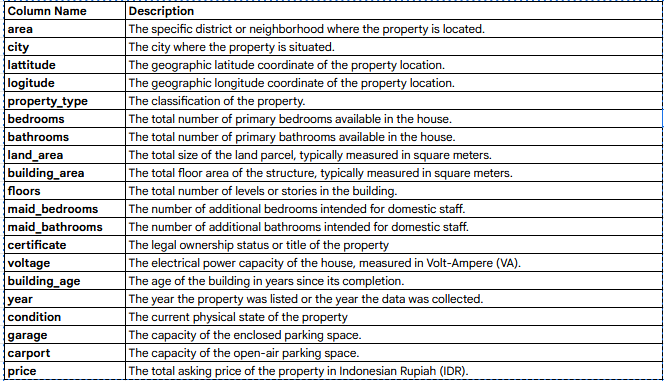

This data is collected from Hacktiv8 source as the learning source of the data science bootcamp.

# II. Import Libraries

In [146]:
# Import libraries
import pandas as pd                                                                             # For Cleaning and Preprocessing
import seaborn as sns                                                                           # For Visualization
import matplotlib.pyplot as plt                                                                 # For Visualization
import numpy as np                                                                              # For Numerical Operations
import sklearn                                                                                  # For Machine Learning Processing
import math                                                                                     # For Mathematical Operations
import statsmodels.stats.api as sms                                                             # For Visualization
import statsmodels.api as sm                                                                    # For Visualization
from feature_engine.outliers import Winsorizer                                                  # For Handling Outlier with Capping
from sklearn.impute import KNNImputer                                                           # For Imputating Missing Value
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, RobustScaler, StandardScaler   # For Scaling and Encoding
from sklearn.model_selection import train_test_split                                            # For Spliting Data
from statsmodels.stats.outliers_influence import variance_inflation_factor                      # For Checking Multicolinearity
from sklearn.compose import ColumnTransformer                                                   # For Pipelining
from sklearn.preprocessing import FunctionTransformer                                           # For Pipelining
from sklearn.pipeline import make_pipeline                                                      # For Pipelining
from scipy import stats                                                                         # For Statistical Operations
from sklearn.model_selection import cross_validate, RandomizedSearchCV                          # For Cross Validation and Tuning
from sklearn.preprocessing import PolynomialFeatures                                            # For Modelling
from sklearn.linear_model import LinearRegression, Lasso, Ridge                                 # For Modelling
from sklearn.ensemble import RandomForestRegressor                                              # For Modelling
from xgboost import XGBRegressor                                                                # For Modelling
from sklearn.metrics import make_scorer, mean_absolute_error, mean_absolute_percentage_error, r2_score    # For Evaluation Metrics
import scipy.stats as stats                                                                     # For Statistical Operations
from scipy.stats import shapiro, jarque_bera                                                    # For Statistical Operations
from statsmodels.stats.stattools import durbin_watson                                           # For Statistical Operations
from statsmodels.graphics.tsaplots import plot_acf                                              # For Statistical Operations
from sklearn.compose import TransformedTargetRegressor                                          # For Transformer Targer Pipeline
import dill                                                                                     # For Saving Model

# III. Data Loading



In [147]:
# Load Dataset
df = pd.read_csv('house-price-v2.csv')

# Check Data
df

,area,city,lattitude,logitude,property_type,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,certificate,voltage,building_age,year,condition,garage,carport,price
0,Summarecon Bekasi,Bekasi,-6.22,106.99,rumah,4.00,4.00,239.00,272.00,2.00,0.00,1.00,shm - sertifikat hak milik,4400 mah,5.00,"2,017.00",bagus,0,0,"2,990,000,000.00"
1,Summarecon Bekasi,Bekasi,-6.22,106.99,rumah,3.00,2.00,55.00,69.00,2.00,0.00,0.00,hgb - hak guna bangunan,2200 mah,6.00,"2,016.00",bagus,0,1,"1,270,000,000.00"
2,Summarecon Bekasi,Bekasi,-6.22,106.99,rumah,3.00,3.00,119.00,131.00,2.00,1.00,1.00,hgb - hak guna bangunan,2200 mah,1.00,"2,021.00",bagus,1,1,"1,950,000,000.00"
3,Summarecon Bekasi,Bekasi,-6.22,106.99,rumah,3.00,3.00,180.00,174.00,2.00,1.00,1.00,shm - sertifikat hak milik,3500 mah,6.00,"2,016.00",bagus sekali,1,0,"3,300,000,000.00"
4,Summarecon Bekasi,Bekasi,-6.22,106.99,rumah,4.00,3.00,328.00,196.00,2.00,1.00,1.00,shm - sertifikat hak milik,3500 mah,9.00,"2,013.00",bagus,1,1,"4,500,000,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029,Jombang,Tangerang,-6.30,106.70,rumah,2.00,1.00,72.00,36.00,1.00,0.00,0.00,shm - sertifikat hak milik,1300 mah,0.00,"2,022.00",baru,1,1,"588,000,000.00"
3030,Lengkong Kulon,Tangerang,-6.28,106.64,rumah,3.00,2.00,85.00,60.00,2.00,0.00,0.00,shm - sertifikat hak milik,1300 mah,0.00,"2,022.00",baru,0,1,"785,000,000.00"
3031,Lengkong Kulon,Tangerang,-6.28,106.64,rumah,3.00,2.00,78.00,60.00,2.00,0.00,0.00,shm - sertifikat hak milik,1300 mah,0.00,"2,022.00",baru,0,1,"755,000,000.00"
3032,BSD Provance Parkland,Tangerang,-6.29,106.67,rumah,3.00,2.00,60.00,65.00,2.00,0.00,0.00,shm - sertifikat hak milik,2200 mah,0.00,"2,022.00",baru,0,1,"800,000,000.00"


In [148]:
# Check The Total of Duplicated Data
df.duplicated().sum()

183

In [149]:
# Delete Duplicated Data
df = df.drop_duplicates().reset_index()

Considering the data source contains advertisings, so that we drop all duplicated data

# IV. Exploratory Data Analysis

In [150]:
# Duplicate Dataset for Exploratory Data Analysis
df_eda = df.copy()

### 1. How is the percentage of houses based on voltage category?

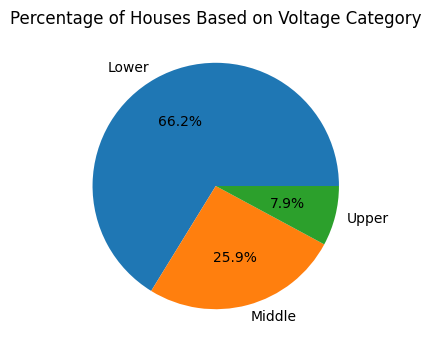

In [151]:
# Data Preprocessing for binning the voltage
df_eda['voltage'] = df_eda['voltage'].astype(str).str.replace(' mah', '').astype(int)

# Condition Setting
conditions = [(df_eda["voltage"] >=450) & (df_eda["voltage"] <= 2200) ,
              (df_eda["voltage"] >= 3300) & (df_eda["voltage"] <= 5500),
              (df_eda["voltage"] >= 6600)]
choices = ["Lower", "Middle", "Upper"]

# Creating New Column
df_eda["voltage_cat"] = np.select(conditions,
                            choices,default=False)

# Deleting Column
df_eda = df_eda.drop(columns=['voltage'])

# Visualization
voltage_counts = df_eda['voltage_cat'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(voltage_counts, labels=voltage_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Houses Based on Voltage Category')
plt.show()

Majority of houses are low voltage category (450-2200 VA) by 66%, and for medium and high voltage categories, they are 25% and 7% subsequently. The market is heavily saturated with low-voltage properties, reflecting a standard residential profile, whereas high-voltage luxury or specialized estates remain a selective minority within the current inventory.

### 2. What are top 5 areas of the most luxury houses and the average price of each area?
*Luxury houses are defined by requiring more than 300 meter square of building area.

Top 5 Areas with The Most Luxury House and The Average Houses Price on Top 5:


,Total,Price (billion)
area,,
Sentul City,66,10.22
Pantai Indah Kapuk,33,20.21
Kemang,23,21.40
BSD,19,14.20
Alam Sutera,14,10.79


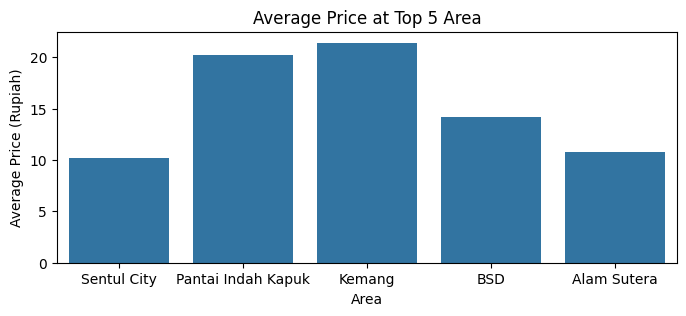

In [152]:
# Building Area Filtering
luxury_houses = df_eda[df_eda['building_area'] >= 300]

# Luxury House Counting on Each Area
top_luxury_area = pd.DataFrame(luxury_houses['area'].value_counts().sort_values(ascending=False).head(5))
top_luxury_area=top_luxury_area.rename(columns={'count':'Total','area':'Area'})

# Average Houses Price on Top 5
top_luxury_area['Price (billion)'] = luxury_houses[luxury_houses['area'].isin(top_luxury_area.index)].groupby('area')['price'].mean().sort_values(ascending=False)/1e9
print("Top 5 Areas with The Most Luxury House and The Average Houses Price on Top 5:")
display(top_luxury_area)

# Visualization
plt.figure(figsize=(8, 3))
sns.barplot(x=top_luxury_area.index, y=top_luxury_area['Price (billion)'])
plt.title('Average Price at Top 5 Area')
plt.xlabel('Area')
plt.ylabel('Average Price (Rupiah)')
plt.show()

Based on the quantitative exploration presented above, it is evident that Sentul City constitutes the region with the highest concentration of luxury properties. However, in terms of market valuation, Kemang maintains the highest average property price, followed by Pantai Indah Kapuk, BSD, Alam Sutera, and Sentul City respectively.

A significant insight derived from this analysis is that while Sentul City leads in the volume of luxury housing units, it offers a more competitive and lower average price point compared to the other top-tier areas. This suggests that Sentul City may present a higher value proposition for buyers seeking luxury characteristics at a relatively lower entry price.

### 3. Are the old house (built before 2000) cheaper?

Old Houses' Statistic


,price,land_area,building_area
mean,"10,905,526,315.79",617.05,341.50
median,"4,900,000,000.00",361.50,300.00
min,"610,000,000.00",70.00,71.00
max,"54,500,000,000.00","5,025.00",950.00



New Houses' Statistic


,price,land_area,building_area
mean,"3,785,341,272.66",183.99,174.12
median,"1,440,000,000.00",105.00,109.00
min,"42,000,000.00",12.00,18.00
max,"580,000,000,000.00","8,000.00","3,000.00"



rho-correlation: -0.33, p-value: 6.450814285903148e-75



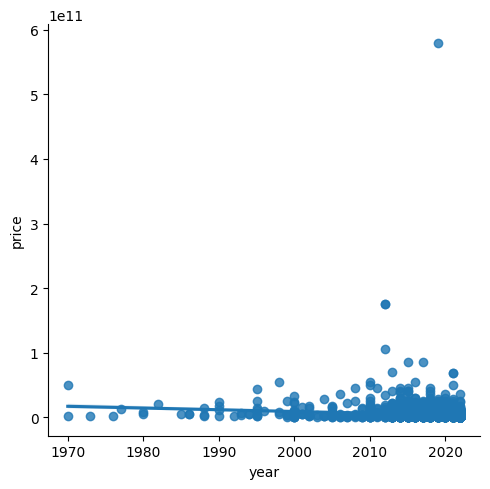

In [153]:
# General Exploration
# Splitting Data
old_houses = df_eda[df_eda['year'] < 2000]
new_houses = df_eda[df_eda['year'] >= 2000]

# Display Aggregation Table
print("Old Houses' Statistic")
display(old_houses[['price','land_area','building_area']].agg(['mean','median','min','max']))
print()
print("New Houses' Statistic")
display(new_houses[['price','land_area','building_area']].agg(['mean','median','min','max']))
print()

# Correlation Analysis
sns.lmplot(data=df_eda,x='year', y='price')
corr_rho, pval_s = stats.spearmanr(df_eda['year'], df_eda['price'])
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")
print()

Based on the correlation analysis conducted, it is observed that residential properties constructed prior to the year 2000 tend to command higher market prices compared to more modern builds. This phenomenon is further evidenced by a negative correlation between property prices and their respective years of construction.

Upon deeper investigation into the underlying causes, a preliminary assessment reveals a strong relationship between price, land area, and building area. The data indicates that properties built before 2000 generally feature significantly larger land and building areas, which serves as the primary driver for their elevated valuations.

In initial assumption, to acquire more affordably priced housing, it is recommended that prospective buyers prioritize properties with a more recent year of construction. Furthermore, buyers should strategically evaluate other critical factors, such as land and building dimensions, rather than solely relying on the age of the building as a primary consideration.

# V. Feature Engineering

## Data Preprocessing

In [154]:
# Check Missing Values
df=df.drop(columns='index')
df.isna().sum()

area               0
city               0
lattitude          0
logitude           0
property_type      0
bedrooms          26
bathrooms         21
land_area          0
building_area      0
floors             1
maid_bedrooms      0
maid_bathrooms     0
certificate       95
voltage            0
building_age       0
year               0
condition          0
garage             0
carport            0
price              0
dtype: int64

There are some missing values on columns, 'bedroom', 'bathroom','certificate'.

In [155]:
# Check Data at Columns with Missing Values
display(df['certificate'].unique())
display(df['bedrooms'].unique())
display(df['bathrooms'].unique())
display(df['floors'].unique())

array(['shm - sertifikat hak milik', 'hgb - hak guna bangunan',
       'lainnya (ppjb,girik,adat,dll)', nan], dtype=object)

array([ 4.,  3.,  2.,  5., nan,  6.,  8.,  1., 36., 11.,  7., 16., 13.,
        9., 20., 12., 50., 57., 10.])

array([ 4.,  2.,  3.,  1., nan,  9.,  5., 36.,  6.,  8.,  7., 20., 12.,
       50., 57., 13., 10.])

array([ 2.,  3.,  1.,  4., nan,  5.])

From the information above, the first step is dropping missing values on 'certificate' because on buying a house, certificate is the most important aspect so that we cannot impute those and the most safe decision is dropping all missing values.

In [156]:
# Drop Missing Values on Certificate
df = df.dropna(subset=['certificate'])
df.isna().sum()

area               0
city               0
lattitude          0
logitude           0
property_type      0
bedrooms          26
bathrooms         21
land_area          0
building_area      0
floors             1
maid_bedrooms      0
maid_bathrooms     0
certificate        0
voltage            0
building_age       0
year               0
condition          0
garage             0
carport            0
price              0
dtype: int64

After we drop missing values on 'certificate', it seems there are missing values we should handle. To handle those, we use KNN Imputer for reasonable imputer. It will be implemented on pipeline.

In [157]:
# Check Distribution with Skewness
num_cols = list(df.select_dtypes(exclude='object').columns)
list_item= []
for col in num_cols:
    skew_val = round(df[col].skew(), 1)
    if abs(skew_val) <= 0.5:
        label = 'normal'
    elif abs(skew_val) <= 1.0:
        label = 'medium skewed'
    else:
        label = 'highly skewed'
    list_item.append([col, skew_val, label])

pd.DataFrame(columns=['Columns', 'Skew Value', 'Distribution'], data= list_item)

,Columns,Skew Value,Distribution
0,lattitude,-0.60,medium skewed
1,logitude,4.50,highly skewed
2,bedrooms,15.40,highly skewed
3,bathrooms,14.30,highly skewed
4,land_area,11.70,highly skewed
5,building_area,4.50,highly skewed
6,floors,0.40,normal
7,maid_bedrooms,1.50,highly skewed
8,maid_bathrooms,1.20,highly skewed
9,building_age,2.80,highly skewed


In [158]:
# Check Data Aggregation
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
lattitude,"2,756.00",-6.33,0.13,-6.89,-6.40,-6.30,-6.24,-6.10
logitude,"2,756.00",106.79,0.17,106.40,106.70,106.80,106.87,109.77
bedrooms,"2,730.00",3.25,1.94,1.00,2.00,3.00,4.00,57.00
bathrooms,"2,735.00",2.54,2.02,1.00,2.00,2.00,3.00,57.00
land_area,"2,756.00",189.75,356.99,12.00,72.00,105.00,180.00,"8,000.00"
building_area,"2,756.00",175.85,206.46,18.00,63.00,110.00,200.00,"3,000.00"
floors,"2,755.00",1.75,0.63,1.00,1.00,2.00,2.00,5.00
maid_bedrooms,"2,756.00",0.48,0.66,0.00,0.00,0.00,1.00,6.00
maid_bathrooms,"2,756.00",0.37,0.53,0.00,0.00,0.00,1.00,5.00
building_age,"2,756.00",4.29,5.54,0.00,0.00,3.00,7.00,52.00


In [159]:
# Drop outlier on the target column
df = df.drop(df['price'].nlargest(2).index)

**Skewness Analysis and Outlier Mitigation Strategy**

Following a comprehensive review of the skewness values and data aggregation results, the following data treatment strategies have been established for the respective features:
1. High Skewness Mitigation: The "longitude" feature exhibits a highly skewed distribution. To mitigate the impact of extreme values, outlier capping was implemented using the Interquartile Range (IQR) method with a multiplier of 3.
2. Continuous and Discrete Feature Refinement: Features including "land_area", "building_area", "building_age", "bedrooms", "bathrooms", and "maid_bedrooms" were identified as highly skewed. These variables underwent capping via the IQR*3 method. Additionally, rounding was applied to these features as they represent discrete quantitative data.
3. Moderate Skewness Adjustment: The "latitude" feature was classified as having moderate skewness. Consequently, capping was performed using the standard IQR*1.5 method.
4. Baseline Retention: Capping was not applied to the "garage" and "floors" features, as their distributions were found to be within normal parameters. Similarly, the "carport" feature was retained in its original state because its values are confined to a narrow range (0–1), indicating an absence of significant outliers.
5. Procedural Sequencing: Outlier capping will be executed prior to missing data imputation. This sequence is justified by the low frequency of null entries, ensuring that the feature distribution is stabilized before the final data completion phase.

In [160]:
#Splitting Dataset Features and Target
X = df.drop(['price'], axis = 1)
y=df['price']
X

,area,city,lattitude,logitude,property_type,bedrooms,bathrooms,land_area,building_area,floors,maid_bedrooms,maid_bathrooms,certificate,voltage,building_age,year,condition,garage,carport
0,Summarecon Bekasi,Bekasi,-6.22,106.99,rumah,4.00,4.00,239.00,272.00,2.00,0.00,1.00,shm - sertifikat hak milik,4400 mah,5.00,"2,017.00",bagus,0,0
1,Summarecon Bekasi,Bekasi,-6.22,106.99,rumah,3.00,2.00,55.00,69.00,2.00,0.00,0.00,hgb - hak guna bangunan,2200 mah,6.00,"2,016.00",bagus,0,1
2,Summarecon Bekasi,Bekasi,-6.22,106.99,rumah,3.00,3.00,119.00,131.00,2.00,1.00,1.00,hgb - hak guna bangunan,2200 mah,1.00,"2,021.00",bagus,1,1
3,Summarecon Bekasi,Bekasi,-6.22,106.99,rumah,3.00,3.00,180.00,174.00,2.00,1.00,1.00,shm - sertifikat hak milik,3500 mah,6.00,"2,016.00",bagus sekali,1,0
4,Summarecon Bekasi,Bekasi,-6.22,106.99,rumah,4.00,3.00,328.00,196.00,2.00,1.00,1.00,shm - sertifikat hak milik,3500 mah,9.00,"2,013.00",bagus,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,Jombang,Tangerang,-6.30,106.70,rumah,2.00,1.00,72.00,36.00,1.00,0.00,0.00,shm - sertifikat hak milik,1300 mah,0.00,"2,022.00",baru,1,1
2847,Lengkong Kulon,Tangerang,-6.28,106.64,rumah,3.00,2.00,85.00,60.00,2.00,0.00,0.00,shm - sertifikat hak milik,1300 mah,0.00,"2,022.00",baru,0,1
2848,Lengkong Kulon,Tangerang,-6.28,106.64,rumah,3.00,2.00,78.00,60.00,2.00,0.00,0.00,shm - sertifikat hak milik,1300 mah,0.00,"2,022.00",baru,0,1
2849,BSD Provance Parkland,Tangerang,-6.29,106.67,rumah,3.00,2.00,60.00,65.00,2.00,0.00,0.00,shm - sertifikat hak milik,2200 mah,0.00,"2,022.00",baru,0,1


In [161]:
# Splitting Train & Test Dataset
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.25, random_state = 7)
print('Validation Size', X_val.shape)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Validation Size (551, 19)
Train Size (1652, 19)
Test Size (551, 19)


## Cardinality Check and Transformation

In [162]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2754 entries, 0 to 2850
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            2754 non-null   object 
 1   city            2754 non-null   object 
 2   lattitude       2754 non-null   float64
 3   logitude        2754 non-null   float64
 4   property_type   2754 non-null   object 
 5   bedrooms        2728 non-null   float64
 6   bathrooms       2733 non-null   float64
 7   land_area       2754 non-null   float64
 8   building_area   2754 non-null   float64
 9   floors          2753 non-null   float64
 10  maid_bedrooms   2754 non-null   float64
 11  maid_bathrooms  2754 non-null   float64
 12  certificate     2754 non-null   object 
 13  voltage         2754 non-null   object 
 14  building_age    2754 non-null   float64
 15  year            2754 non-null   float64
 16  condition       2754 non-null   object 
 17  garage          2754 non-null   int64 

In [163]:
# Cardinality Check
pd.set_option('display.max_colwidth', None)

# Define list of column's names
cat_cols = list(X.select_dtypes(include='object').columns)

# Loop for making information table
list_item = []
for col in cat_cols:
  list_item.append([col, X[col].nunique(), X[col].unique()])

# Display data
pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=list_item)

,nama kolom,jumlah nilai unique,nilai unique
0,area,361,"[Summarecon Bekasi, Bekasi, Setu, Harapan Indah, Bekasi Kota, Cibitung, Cibubur, Mustikajaya, Jatisampurna, Jatiwarna, Pondok Gede, Jaka Setia, Jati Asih, Grand Wisata, Jatibening, Bekasi Utara, Rawalumbu, Tambun Selatan, Harapan Baru, Pondokmelati, Babelan, Kemang Pratama, Bekasi Timur, Jatiwaringin, Tarumajaya, Cikarang Selatan, Kebalen, Kayuringin Jaya, Bintara, Jatirangga, Cikarang, Jati Mekar, Duta Harapan, Jati Sari, Pejuang, Galaxy, Tanah Tinggi, Jaka Sampurna, Bekasi Barat, Tambun Utara, Kaliabang, Mustikasari, Cimuning, Caman, Cikunir, Satriajaya, Pondok Ungu, Pekayon, Harapan Mulya, Harapan Jaya, Perwira, Jatikramat, Jatimurni, Jatimelati, Karang Satria, Kranji, Margahayu, Serang Baru, Duren Jaya, Jati Luhur, Jababeka, Komsen, Jatiranggon, Narogong, Bantar Gebang, Jatimakmur, Jati Cempaka, Golden City, Pedurenan, Medan Satria, Pasirmulya, Cilendek Timur, Sentul City, Cileungsi, Kemang, Ciomas, Gunung Sindur, Bojong Gede, Kedung Halang, Tapos, Cibinong, Sentul, Sukaraja, Tanah Sareal, Ciparigi, Katulampa, Bogor Barat, Gunung Putri, Cilendek Barat, Tamansari, Kota Wisata, Bojongsari, Curug, Babakan Madang, Bojong, Cimahpar, Tanah Baru, Bogor Nirwana Residence, Tegallega, Parung Panjang, ...]"
1,city,9,"[ Bekasi, Bogor, Depok, Jakarta Barat, Jakarta Selatan, Jakarta Utara, Jakarta Timur, Jakarta Pusat, Tangerang]"
2,property_type,1,[rumah]
3,certificate,3,"[shm - sertifikat hak milik, hgb - hak guna bangunan, lainnya (ppjb,girik,adat,dll)]"
4,voltage,29,"[4400 mah, 2200 mah, 3500 mah, 1300 mah, 5500 mah, 6600 mah, 7700 mah, 3300 mah, 7600 mah, 900 mah, 47500 mah, 11000 mah, 8000 mah, 450 mah, 10000 mah, 10600 mah, 53000 mah, 16500 mah, 13200 mah, 13900 mah, 17600 mah, 41500 mah, 12700 mah, 23000 mah, 13300 mah, 33000 mah, 24000 mah, 22000 mah, 9500 mah]"
5,condition,5,"[bagus, bagus sekali, baru, sudah renovasi, butuh renovasi]"


**Categorical Feature Analysis and Transformation**

A cardinality check was performed on the categorical features to determine the number of unique values within each column. Based on the assessment of these seven categorical columns, the following transformations were implemented to optimize the dataset for modeling:
1. Geospatial Optimization: The "area" and "city" features were removed as their geographical information is already sufficiently represented by the "latitude" and "longitude" coordinates.
2. Redundant Feature Removal: The "property_type" column was excluded from the analysis because it contains only a single unique value ("rumah"), providing no predictive variance for the model.
3. Cardinality Reduction: A grouping strategy was applied to the "condition" feature to reduce its cardinality, thereby streamlining the categorical levels.
4. Feature Engineering: The raw "voltage" data underwent a transformation process where it was binned and categorized into a new feature labeled "voltage_cat".
5. Feature Retention: The "certificate" column was retained in its original state as it was already classified as having low cardinality, making it suitable for direct inclusion in the model.

**Model Improvement Based on Assumption Check and Model Training**

1. Based on the Multicollinearity Check, similarity between "hgb" and "lainnya" is close and far from "shm" so that cardinality on 'certificate' column should be handle with minimazing being 2 categories and encoded by OrdinalEncoder.
2. Based on the Multicollinearity Check, "building_area" and "land_area"

In [164]:
# Cardinality Transformation
# Set output configuration
sklearn.set_config(transform_output="pandas")

# Function for voltage transformation
def voltage_transformation (x):
    x['voltage'] = x['voltage'].astype(str).str.replace(' mah', '').astype(int) # Removing "mah" and changing data type
    # Condition Setting
    conditions = [(x["voltage"] >=450) & (x["voltage"] <= 2200) ,
                (x["voltage"] >= 3300) & (x["voltage"] <= 5500),
                (x["voltage"] >= 6600)]
    choices = ["Lower", "Middle", "Upper"]

    # Creating New Column
    x["voltage_cat"] = np.select(conditions,
                                choices,default=False)
    return x
voltage_cat=FunctionTransformer(voltage_transformation)

# Function for condition transformation
def condition_transformation(x):
    # Condition for Grouping
    conditions = [(x["condition"] == 'butuh renovasi'),
                (x["condition"] == 'bagus') | (x["condition"] == 'bagus sekali') | (x["condition"] == 'sudah renovasi'),
                (x["condition"] == 'baru')]
    choices = ["Tidak Baik", "Baik", "Sangat Baik"]

    # Creating New Column
    x["condition_cat"] = np.select(conditions,
                                choices,default=False)
    return x
condition_cat=FunctionTransformer(condition_transformation)

# Function for certificate transformation
def certificate_transformation(x):
    x['certificate']=x['certificate'].str.replace('hgb - hak guna bangunan','non shm').str.replace('lainnya (ppjb,girik,adat,dll)','non shm').str.replace('shm - sertifikat hak milik','shm')
    return x
certificate=FunctionTransformer(certificate_transformation)

# Function for droping unused columns
def cardinality_selection (x):
    x=x.drop(columns=['property_type','area','voltage', 'condition','year'], axis=1)
    return x
drop_column=FunctionTransformer(cardinality_selection)

# Pipeline for cardinality transformation process
cardinality_pipeline = make_pipeline(voltage_cat, condition_cat, certificate, drop_column)
cardinality_pipeline

Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function voltage_transformation at 0x000001DF9BAD3AF0>)),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function condition_transformation at 0x000001DF9BA74820>)),
                ('functiontransformer-3',
                 FunctionTransformer(func=<function certificate_transformation at 0x000001DF9BA74160>)),
                ('functiontransformer-4',
                 FunctionTransformer(func=<function cardinality_selection at 0x000001DF9BA740D0>))])

## Feature Engineering Variables

In [165]:
# Define Numerical 
numerical_cols_a = ['logitude', 'bedrooms', 'bathrooms', 'maid_bedrooms','land_area', 'building_area', 'maid_bathrooms']
numerical_cols_b = ['lattitude']
numerical_cols_c = ['floors', 'garage','carport']

# Capping and Scaling for Highly Skew
pipe_num_cols_a = make_pipeline(Winsorizer(capping_method='iqr',
                                           tail='both',
                                           fold=3,
                                           missing_values='ignore'),
                                RobustScaler())

# Capping and Scaling for Medium Skew
pipe_num_cols_b = make_pipeline(Winsorizer(capping_method='iqr',
                                           tail='both',
                                           fold=1.5,
                                           missing_values='ignore'),
                                StandardScaler())

# Capping and Scaling for Normal
pipe_num_cols_c = StandardScaler()

# Encoding for ordinal columns
ordinal_cols = ['voltage_cat', 'condition_cat', 'certificate']
ordinal_encoding = make_pipeline(OrdinalEncoder(categories=[["Lower", "Middle", "Upper"],['Tidak Baik','Baik','Sangat Baik'], ['non shm','shm']]),
                                 StandardScaler())

# Encoding for nominal column
nominal_cols = ['city']
nominal_encoding = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Pipeline for capping process
transformation_pipeline = ColumnTransformer ([('pipe_num_a',pipe_num_cols_a, numerical_cols_a),
                                      ('pipe_num_b', pipe_num_cols_b, numerical_cols_b),
                                       ('pipe_num_c', pipe_num_cols_c, numerical_cols_c),
                                      ('pipe_ordinal_encoded',ordinal_encoding, ordinal_cols),
                                      ('pipe_nominal_encoded',nominal_encoding, nominal_cols)], remainder='drop')
transformation_pipeline

ColumnTransformer(transformers=[('pipe_num_a',
                                 Pipeline(steps=[('winsorizer',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=3,
                                                             missing_values='ignore',
                                                             tail='both')),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 ['logitude', 'bedrooms', 'bathrooms',
                                  'maid_bedrooms', 'land_area', 'building_area',
                                  'maid_bathrooms']),
                                ('pipe_num_b',
                                 Pipeline(steps=[('winsorizer',
                                                  Winsorizer(capping_me...
                                ('pipe_ordinal_encoded',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Lower',
                                                                              'Middle',
                                                                              'Upper'],
                                                                             ['Tidak '
                                                                              'Baik',
                                                                              'Baik',
                                                                              'Sangat '
                                                                              'Baik'],
                                                                             ['non '
                                                                              'shm',
                                                                              'shm']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['voltage_cat', 'condition_cat',
                                  'certificate']),
                                ('pipe_nominal_encoded',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['city'])])

In [166]:
# Imputation for Missing Values
imputation_pipeline = KNNImputer(n_neighbors=5)

## Pipeline

In [167]:
# Final Feature Engineering Pipeline
feature_engineering = make_pipeline(cardinality_pipeline, transformation_pipeline, imputation_pipeline)
feature_engineering

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('functiontransformer-1',
                                  FunctionTransformer(func=<function voltage_transformation at 0x000001DF9BAD3AF0>)),
                                 ('functiontransformer-2',
                                  FunctionTransformer(func=<function condition_transformation at 0x000001DF9BA74820>)),
                                 ('functiontransformer-3',
                                  FunctionTransformer(func=<function certificate_transformation at 0x00000...
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Lower',
                                                                                               'Middle',
                                                                                               'Upper'],
                                                                                              ['Tidak '
                                                                                               'Baik',
                                                                                               'Baik',
                                                                                               'Sangat '
                                                                                               'Baik'],
                                                                                              ['non '
                                                                                               'shm',
                                                                                               'shm']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['voltage_cat',
                                                   'condition_cat',
                                                   'certificate']),
                                                 ('pipe_nominal_encoded',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['city'])])),
                ('knnimputer', KNNImputer())])

# VI. Model Preparation

## Assumption Check (Pra Training)

In [168]:
y_train.sort_values().tail(5)

1916    69,000,000,000.00
2097    85,000,000,000.00
1700    85,000,000,000.00
1809   106,000,000,000.00
1990   175,000,000,000.00
Name: price, dtype: float64

In [169]:
# Feature Transformation
df_assumpt_check=feature_engineering.fit_transform(X_train)
df_assumpt_check

,pipe_num_a__logitude,pipe_num_a__bedrooms,pipe_num_a__bathrooms,pipe_num_a__maid_bedrooms,pipe_num_a__land_area,pipe_num_a__building_area,pipe_num_a__maid_bathrooms,pipe_num_b__lattitude,pipe_num_c__floors,pipe_num_c__garage,...,pipe_ordinal_encoded__certificate,pipe_nominal_encoded__city_ Bekasi,pipe_nominal_encoded__city_ Bogor,pipe_nominal_encoded__city_ Depok,pipe_nominal_encoded__city_ Jakarta Barat,pipe_nominal_encoded__city_ Jakarta Pusat,pipe_nominal_encoded__city_ Jakarta Selatan,pipe_nominal_encoded__city_ Jakarta Timur,pipe_nominal_encoded__city_ Jakarta Utara,pipe_nominal_encoded__city_ Tangerang
2798,-2.07,0.50,1.00,0.00,2.73,1.12,0.00,0.16,0.39,1.07,...,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2365,-1.15,1.00,4.00,2.00,2.69,2.59,1.00,0.19,1.99,1.07,...,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1485,-0.18,0.00,-1.00,1.00,-0.22,-0.21,0.00,-0.59,-1.21,1.07,...,0.38,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
1527,-0.18,0.00,0.00,0.00,-0.19,-0.18,0.00,-0.59,0.39,-0.93,...,0.38,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
2489,-1.15,1.50,4.00,0.00,3.69,3.18,0.00,0.19,1.99,1.07,...,-2.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,1.00,0.00,0.00,0.00,-0.36,-0.07,0.00,1.11,0.39,1.07,...,0.38,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1729,-0.32,0.50,1.00,1.00,0.88,0.66,1.00,1.78,1.99,1.07,...,-2.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
595,0.27,0.00,1.00,1.00,2.77,0.66,1.00,-1.55,0.39,-0.93,...,0.38,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1882,-1.41,0.50,1.00,1.00,0.14,1.75,1.00,1.31,3.59,1.07,...,-2.65,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00


In [170]:
# Check columns
df_assumpt_check.columns.to_list()

['pipe_num_a__logitude',
 'pipe_num_a__bedrooms',
 'pipe_num_a__bathrooms',
 'pipe_num_a__maid_bedrooms',
 'pipe_num_a__land_area',
 'pipe_num_a__building_area',
 'pipe_num_a__maid_bathrooms',
 'pipe_num_b__lattitude',
 'pipe_num_c__floors',
 'pipe_num_c__garage',
 'pipe_num_c__carport',
 'pipe_ordinal_encoded__voltage_cat',
 'pipe_ordinal_encoded__condition_cat',
 'pipe_ordinal_encoded__certificate',
 'pipe_nominal_encoded__city_ Bekasi',
 'pipe_nominal_encoded__city_ Bogor',
 'pipe_nominal_encoded__city_ Depok',
 'pipe_nominal_encoded__city_ Jakarta Barat',
 'pipe_nominal_encoded__city_ Jakarta Pusat',
 'pipe_nominal_encoded__city_ Jakarta Selatan',
 'pipe_nominal_encoded__city_ Jakarta Timur',
 'pipe_nominal_encoded__city_ Jakarta Utara',
 'pipe_nominal_encoded__city_ Tangerang']

### Linear Relationship Check

c:\Users\DELL\anaconda3\envs\h8_env\lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
c:\Users\DELL\anaconda3\envs\h8_env\lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


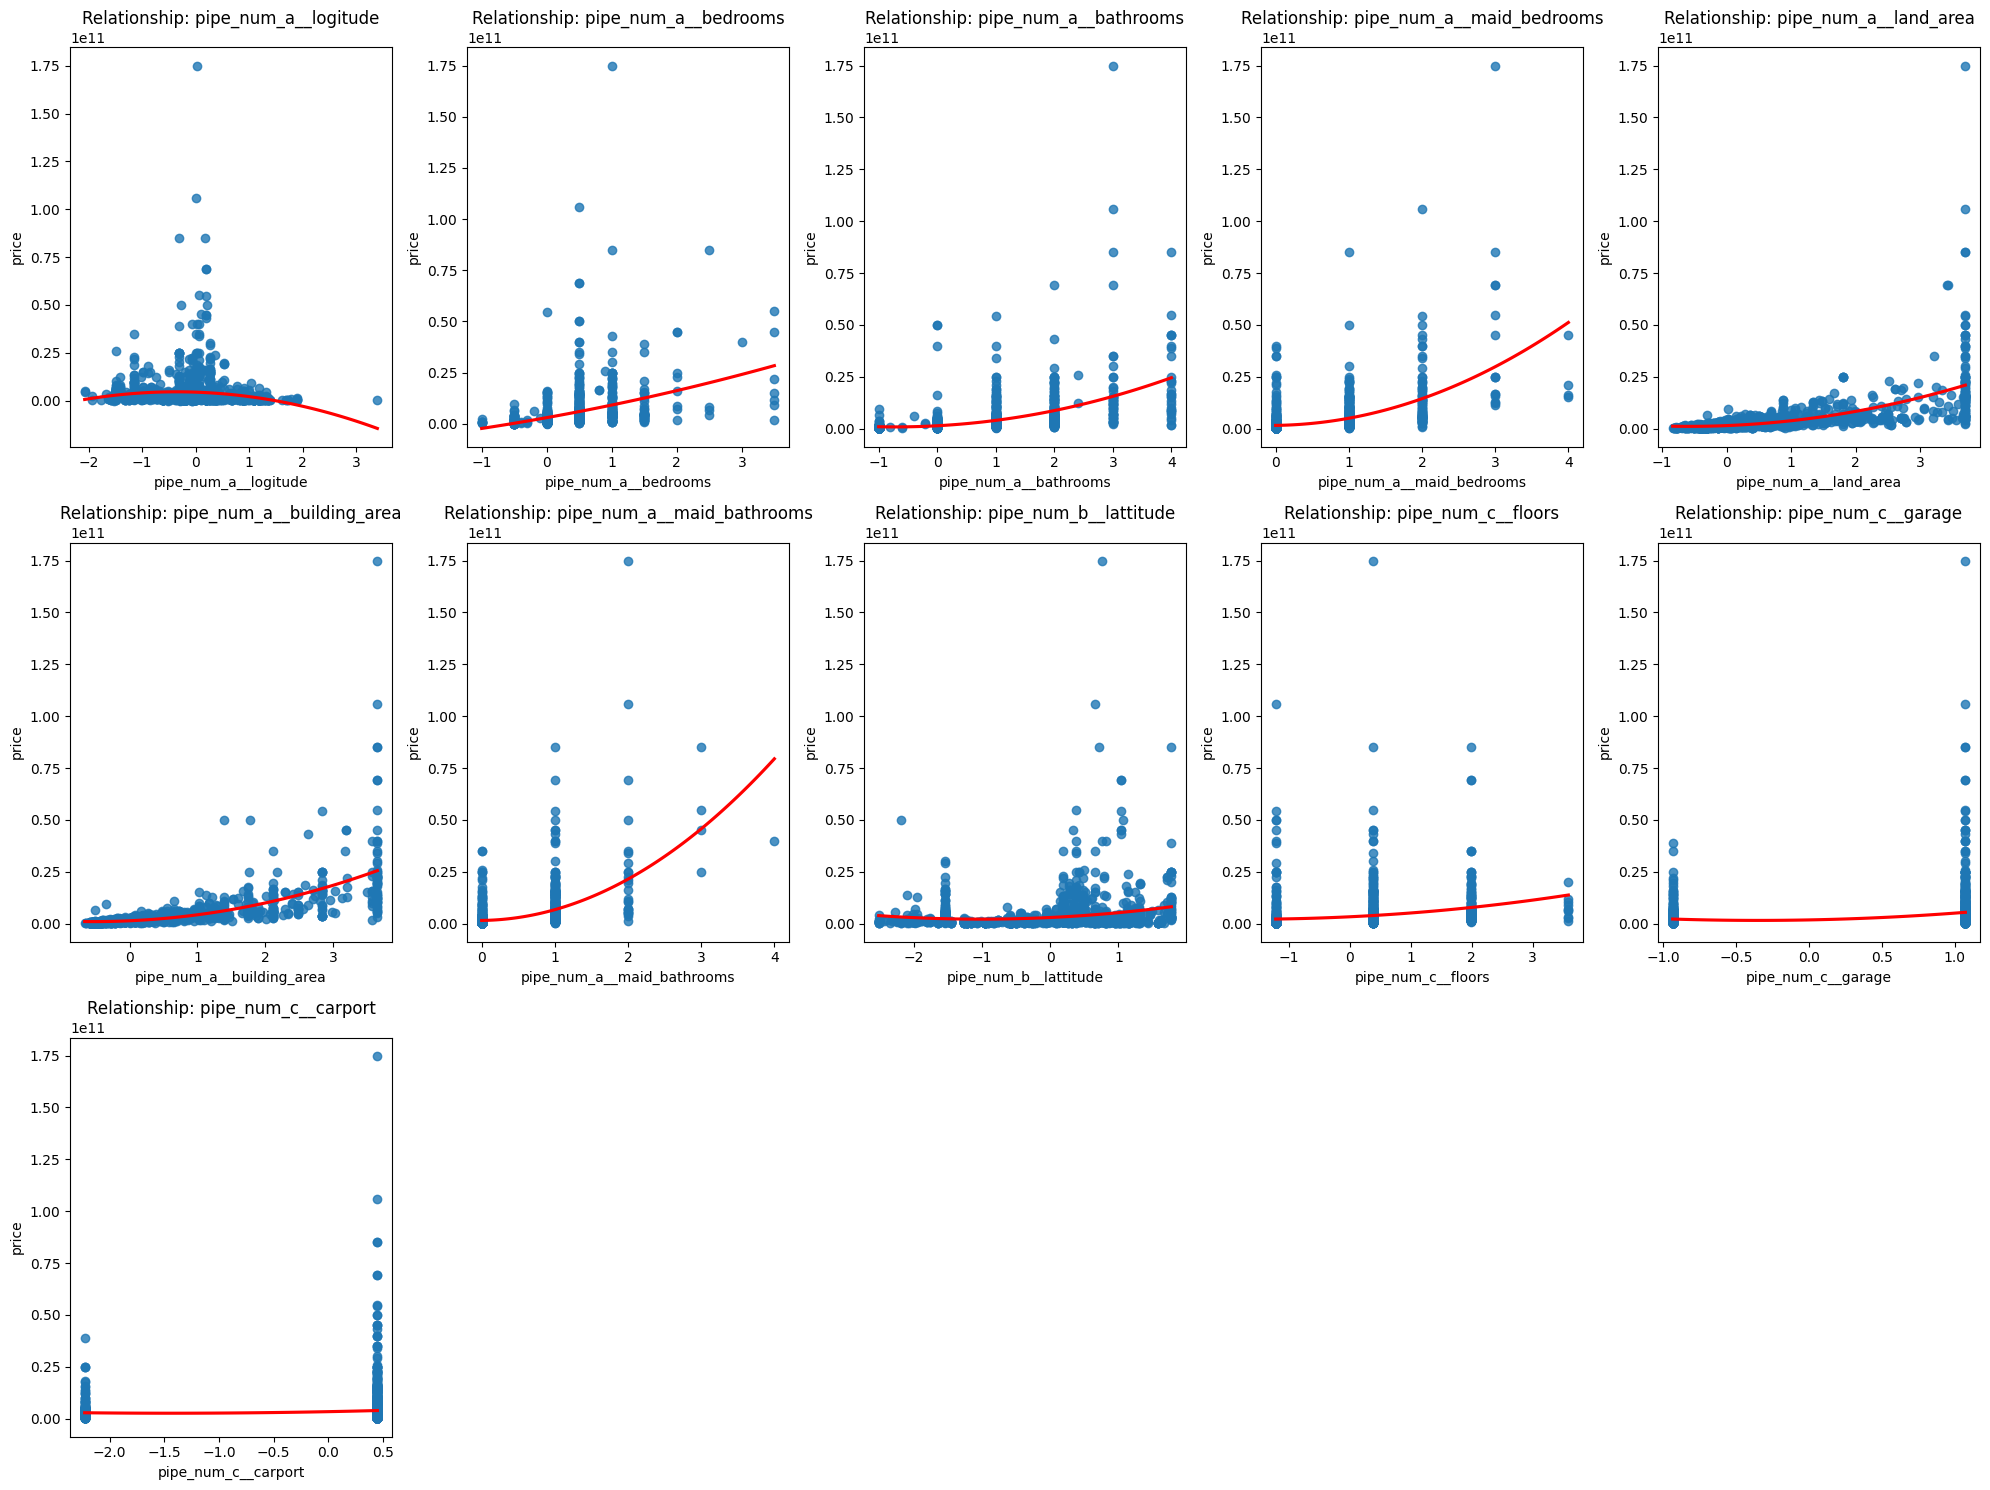

In [171]:
# Define numerical columns
cols = [
 'pipe_num_a__logitude',
 'pipe_num_a__bedrooms',
 'pipe_num_a__bathrooms',
 'pipe_num_a__maid_bedrooms',
 'pipe_num_a__land_area',
 'pipe_num_a__building_area',
 'pipe_num_a__maid_bathrooms',
 'pipe_num_b__lattitude',
 'pipe_num_c__floors',
 'pipe_num_c__garage',
 'pipe_num_c__carport']

# Define linearity chart
num_cols = 5
num_rows = math.ceil(len(cols) / num_cols)
fig = plt.figure(figsize=(20, num_rows * 5))
for index, col_name in enumerate(cols):
    ax = fig.add_subplot(num_rows, num_cols, index + 1)
    
    # Display linearity chart
    sns.regplot(
        data=df_assumpt_check,
        x=col_name,
        y=y_train,
        order=2,
        ci=None,
        line_kws={'color': 'red'},
        ax=ax)
    ax.set_title(f'Relationship: {col_name}', fontsize=12)

plt.tight_layout()
plt.show()

### Multicollinearity Check

In [172]:
# Create a Function to Calculate Variance Inflation Factor
def calc_vif(df_assumpt_check):
    vif = pd.DataFrame()
    vif["Features"] = df_assumpt_check.columns
    vif["VIF"] = [variance_inflation_factor(df_assumpt_check.values, i) for i in range(df_assumpt_check.shape[1])]
    return(vif)

# Check Multicolinearity in X
calc_vif(df_assumpt_check)

,Features,VIF
0,pipe_num_a__logitude,4.62
1,pipe_num_a__bedrooms,2.81
2,pipe_num_a__bathrooms,3.78
3,pipe_num_a__maid_bedrooms,2.92
4,pipe_num_a__land_area,5.22
5,pipe_num_a__building_area,6.96
6,pipe_num_a__maid_bathrooms,2.77
7,pipe_num_b__lattitude,5.83
8,pipe_num_c__floors,1.86
9,pipe_num_c__garage,1.10


## Cross Validation

In [173]:
# Define default algorithms
lr=make_pipeline(feature_engineering, PolynomialFeatures(), LinearRegression())
lasso=make_pipeline(feature_engineering, Lasso())
ridge=make_pipeline(feature_engineering, Ridge())
rf=make_pipeline(feature_engineering, RandomForestRegressor(random_state=42))
xgb=make_pipeline(feature_engineering, XGBRegressor(random_state=42))

# Define variables for cross validation
models = {
    'Polynomial': TransformedTargetRegressor(regressor=lr, func=np.log1p, inverse_func=np.expm1),
    'Lasso': TransformedTargetRegressor(regressor=lasso, func=np.log1p, inverse_func=np.expm1),
    'Ridge': TransformedTargetRegressor(regressor=ridge, func=np.log1p, inverse_func=np.expm1),
    'RandomForest': TransformedTargetRegressor(regressor=rf, func=np.log1p, inverse_func=np.expm1),
    'XGBoost': TransformedTargetRegressor(regressor=xgb, func=np.log1p, inverse_func=np.expm1)
}
results = []
scoring = {'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
           'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False),
           'R2': make_scorer(r2_score, greater_is_better=False)}

# Train cross validation data
for name, model in models.items():
    cv_results = cross_validate(model, X_val, y_val, cv=3, scoring=scoring, n_jobs=-1)
    mae_scores = -cv_results['test_MAE']
    mape_scores = -cv_results['test_MAPE']
    r2_scores = -cv_results['test_R2']
    results.append({
        'Model': name,
        'MAE Mean': mae_scores.mean(),
        'MAE Std': mae_scores.std(),
        'MAPE Mean (%)': mape_scores.mean() * 100,
        'MAPE Std (%)': mape_scores.std() * 100,
        'R2 Score': r2_scores.mean(),
        'R2 Score Std': r2_scores.std()})
    
# Display evaluation metrics
cv_results = pd.DataFrame(results).sort_values(by='MAE Mean')
pd.options.display.float_format = '{:,.2f}'.format
cv_results

,Model,MAE Mean,MAE Std,MAPE Mean (%),MAPE Std (%),R2 Score,R2 Score Std
3,RandomForest,"1,185,499,120.89","398,690,189.24",34.38,5.76,0.69,0.07
4,XGBoost,"1,300,584,359.01","516,802,654.99",36.73,5.42,0.59,0.14
2,Ridge,"1,339,998,018.26","415,952,567.51",38.86,4.47,0.63,0.04
1,Lasso,"2,645,522,658.80","799,011,706.54",110.49,20.05,-0.06,0.04
0,Polynomial,"4,320,088,739.50","382,849,301.91",78.33,7.61,-18.90,14.75


## Hyperparameter Tuning

In [174]:
# Define hyperparameter experiment
param_distributions = {
    'regressor__randomforestregressor__n_estimators': [100, 200, 500, 1000],
    'regressor__randomforestregressor__max_features': ['sqrt', 'log2', None],
    'regressor__randomforestregressor__max_depth': [None, 10, 20, 30, 40, 50],
    'regressor__randomforestregressor__min_samples_split': [2, 5, 10],
    'regressor__randomforestregressor__min_samples_leaf': [1, 2, 4],
    'regressor__randomforestregressor__bootstrap': [True, False]
}

ttr_rf = TransformedTargetRegressor(
    regressor=rf, 
    func=np.log1p, 
    inverse_func=np.expm1
)

# Define evaluation metrics
scoring = {
    'MAE': 'neg_mean_absolute_error',
    'MAPE': 'neg_mean_absolute_percentage_error'}

# Define tuning
random_search = RandomizedSearchCV(
    estimator=ttr_rf,
    param_distributions=param_distributions,
    n_iter=10,
    cv=3,
    scoring=scoring,
    refit='MAE', 
    n_jobs=-1,
    random_state=42,
    verbose=2)

# Train tuning
random_search.fit(X_train, y_train)

# Define the best model
best_model_rand = random_search.best_estimator_

# Predict data train
y_pred_train=best_model_rand.predict(X_train)

# Evaluate data train
mae_train = mean_absolute_error(y_train, y_pred_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Display evaluation
evaluation = {'Metric': ['MAE', 'MAPE (%)', 'R2 Score'],
              'Train Set': [mae_train, mape_train * 100, r2_train]}
df_evaluation = pd.DataFrame(evaluation)
df_evaluation

Fitting 3 folds for each of 10 candidates, totalling 30 fits


,Metric,Train Set
0,MAE,"536,957,594.02"
1,MAPE (%),10.54
2,R2 Score,0.86


# VII. Model Training and Evaluation

## Training and Evaluation

In [175]:
# Predict Test Set with Transformed Target
y_pred = best_model_rand.predict(X_test)

# Evaluate test set
mae_test = mean_absolute_error(y_test, y_pred)
mape_test = mean_absolute_percentage_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Display evaluation table
evaluation = {
    'Metric': ['MAE', 'MAPE (%)', 'R2 Score'],
    'Test Set': [mae_test, mape_test * 100, r2_test]
}
df_evaluation = pd.DataFrame(evaluation)
df_evaluation

,Metric,Test Set
0,MAE,"847,431,786.65"
1,MAPE (%),26.48
2,R2 Score,0.86


## Assumption Check (Pasca Training)

### Homoscedasticity

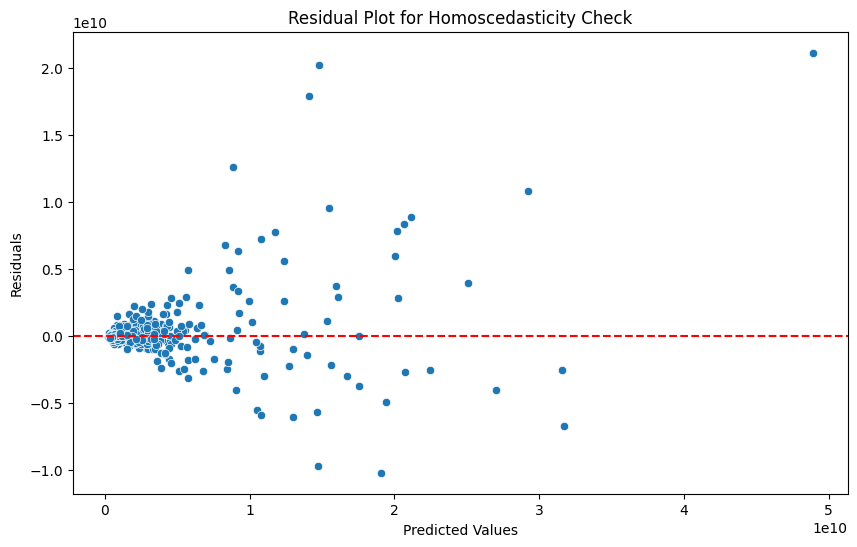

In [176]:
# Calculate residual
residuals = y_test - y_pred

# Homoscedasticity Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Homoscedasticity Check')
plt.show()

**Hyphotesis Analysis**
- H0​: Varians residual adalah konstan (Homoscedasticity).
- H1​: Varians residual tidak konstan (Heteroscedasticity).

In [177]:
# Preparation for Breusch-Pagan Test
X_test = best_model_rand.predict(X_test)
X_test_const = sm.add_constant(X_test)

# Breusch-Pagan Test
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(residuals, X_test_const)
print("=== Breusch-Pagan Test Results ===")
for i, val in enumerate(name):
    print(f"{val}: {test[i]:.6f}")

=== Breusch-Pagan Test Results ===
Lagrange multiplier statistic: 167.435479
p-value: 0.000000
f-value: 239.652191
f p-value: 0.000000


### Residual Normality

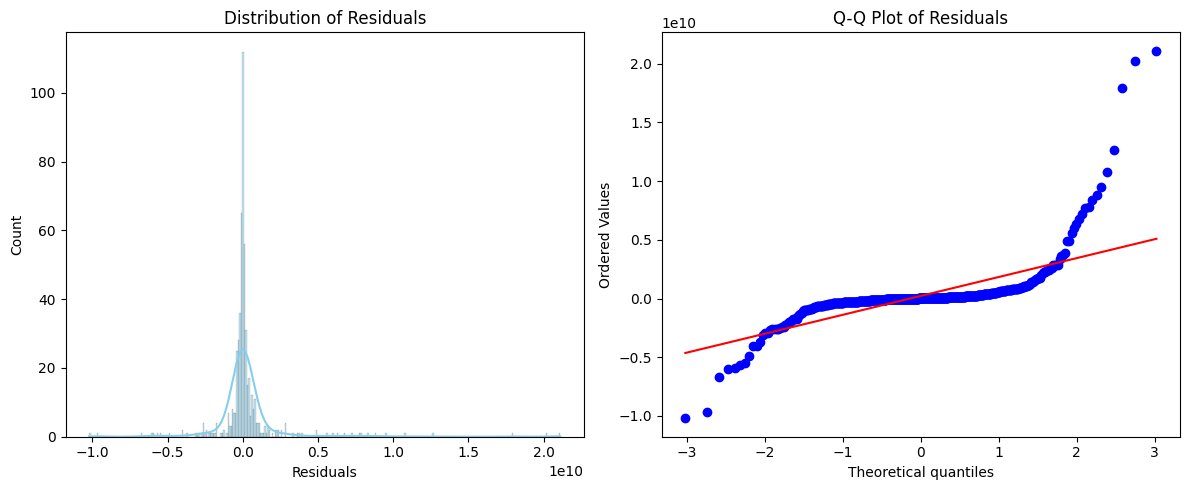

In [178]:
# Define plot
plt.figure(figsize=(12, 5))

# Define subplot for distribution
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, color='skyblue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')

# Define subplot for Q-Q plot of residuals
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

# Display chart
plt.tight_layout()
plt.show()

**Hyphotesis Analysis**
- H0​: Residual terdistribusi normal.
- H1​: Residual tidak terdistribusi normal.

In [179]:
# Jarque-Bera Test (Sering digunakan untuk sampel besar)
jb_stat, jb_p = jarque_bera(residuals)

# Shapiro-Wilk Test (Sangat akurat untuk sampel < 5000)
sw_stat, sw_p = shapiro(residuals)

print("=== Normality Residual Results ===")
print(f"Jarque-Bera Test: Stat={jb_stat:.4f}, p-value={jb_p:.4f}")
print(f"Shapiro-Wilk Test: Stat={sw_stat:.4f}, p-value={sw_p:.4f}")

=== Normality Residual Results ===
Jarque-Bera Test: Stat=29438.5981, p-value=0.0000
Shapiro-Wilk Test: Stat=0.5080, p-value=0.0000


### Autocorrelation

In [180]:
# Durbin-Watson Score
dw_score = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_score:.4f}")

Durbin-Watson statistic: 1.9860


<Figure size 1000x600 with 0 Axes>

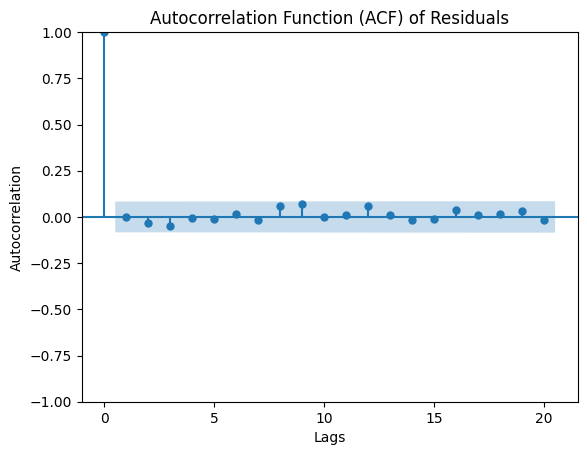

In [181]:
# ACF Plot
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=20)
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# VIII. Model Saving



In [182]:
#Save the files
with open('deployment/model_final.pkl', 'wb') as f:
    dill.dump(best_model_rand, f)